In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

In [23]:
data_path = "C:/Users/Katta's/PycharmProjects/data/usecase3/train.csv"
housing = pd.read_csv(data_path)
data_path = "C:/Users/Katta's/PycharmProjects/data/usecase3/test.csv"
housingt = pd.read_csv(data_path)

In [44]:
pandas_profiling.ProfileReport(housing)

<meta charset="UTF-8">

<style>

        .variablerow {
            border: 1px solid #e1e1e8;
            border-top: hidden;
            padding-top: 2em;
            padding-bottom: 2em;
            padding-left: 1em;
            padding-right: 1em;
        }

        .headerrow {
            border: 1px solid #e1e1e8;
            background-color: #f5f5f5;
            padding: 2em;
        }
        .namecol {
            margin-top: -1em;
            overflow-x: auto;
        }

        .dl-horizontal dt {
            text-align: left;
            padding-right: 1em;
            white-space: normal;
        }

        .dl-horizontal dd {
            margin-left: 0;
        }

        .ignore {
            opacity: 0.4;
        }

        .container.pandas-profiling {
            max-width:975px;
        }

        .col-md-12 {
            padding-left: 2em;
        }

        .indent {
            margin-left: 1em;
        }

        .center-img {
            margin-left: auto !important;
            margin-right: auto !important;
            display: block;
        }

        /* Table example_values */
            table.example_values {
                border: 0;
            }

            .example_values th {
                border: 0;
                padding: 0 ;
                color: #555;
                font-weight: 600;
            }

            .example_values tr, .example_values td{
                border: 0;
                padding: 0;
                color: #555;
            }

        /* STATS */
            table.stats {
                border: 0;
            }

            .stats th {
                border: 0;
                padding: 0 2em 0 0;
                color: #555;
                font-weight: 600;
            }

            .stats tr {
                border: 0;
            }

            .stats td{
                color: #555;
                padding: 1px;
                border: 0;
            }


        /* Sample table */
            table.sample {
                border: 0;
                margin-bottom: 2em;
                margin-left:1em;
            }
            .sample tr {
                border:0;
            }
            .sample td, .sample th{
                padding: 0.5em;
                white-space: nowrap;
                border: none;

            }

            .sample thead {
                border-top: 0;
                border-bottom: 2px solid #ddd;
            }

            .sample td {
                width:100%;
            }


        /* There is no good solution available to make the divs equal height and then center ... */
            .histogram {
                margin-top: 3em;
            }
        /* Freq table */

            table.freq {
                margin-bottom: 2em;
                border: 0;
            }
            table.freq th, table.freq tr, table.freq td {
                border: 0;
                padding: 0;
            }

            .freq thead {
                font-weight: 600;
                white-space: nowrap;
                overflow: hidden;
                text-overflow: ellipsis;

            }

            td.fillremaining{
                width:auto;
                max-width: none;
            }

            td.number, th.number {
                text-align:right ;
            }

        /* Freq mini */
            .freq.mini td{
                width: 50%;
                padding: 1px;
                font-size: 12px;

            }
            table.freq.mini {
                 width:100%;
            }
            .freq.mini th {
                overflow: hidden;
                text-overflow: ellipsis;
                white-space: nowrap;
                max-width: 5em;
                font-weight: 400;
                text-align:right;
                padding-right: 0.5em;
            }

            .missing {
                color: #a94442;
            }
            .alert, .alert > th, .alert > td {
                col

In [33]:
pandas_profiling.ProfileReport(housingt)
plt.isinteractive()

False

In [42]:
print(housing_cat.head(5))

  MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1  ... GarageType GarageFinish GarageQual GarageCond  \
0      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
1      Veenker      Feedr  ...     Attchd          RFn         TA         TA   
2      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
3      Crawfor       Norm  ...     Detchd          Unf         TA         TA   
4      NoRidge       Norm  ...     Attchd          RFn         TA         TA   

  PavedDrive PoolQC Fence MiscFeature SaleType Sal

In [38]:
print(housingt_cat.head(9))

  MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RH   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
4       RL   Pave   NaN      IR1         HLS    AllPub    Inside       Gtl   
5       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
6       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
7       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
8       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   

  Neighborhood Condition1  ... GarageType GarageFinish GarageQual GarageCond  \
0        NAmes      Feedr  ...     Attchd          Unf         TA         TA   
1        NAmes       Norm  ...     Attchd          Unf     

In [43]:
le=LabelEncoder()
for col in housing_cat.columns.values:
        le.fit(housing_cat[col])
        housing_cat[col]=le.transform(housing_cat[col])


TypeError: '<' not supported between instances of 'str' and 'float'

In [79]:

le=LabelEncoder()
for col in housingt_cat.columns.values:
        le.fit(housingt_cat[col])
        housingt_cat[col]=le.transform(housingt_cat[col])

In [80]:
housing_int = housing.select_dtypes(exclude=['object']).copy()


In [81]:
housingt_int = housingt.select_dtypes(exclude=['object']).copy()

In [82]:
housing_int.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1452 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
F

In [83]:
housingt_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 37 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
MasVnrArea       1444 non-null float64
BsmtFinSF1       1458 non-null float64
BsmtFinSF2       1458 non-null float64
BsmtUnfSF        1458 non-null float64
TotalBsmtSF      1458 non-null float64
1stFlrSF         1459 non-null int64
2ndFlrSF         1459 non-null int64
LowQualFinSF     1459 non-null int64
GrLivArea        1459 non-null int64
BsmtFullBath     1457 non-null float64
BsmtHalfBath     1457 non-null float64
FullBath         1459 non-null int64
HalfBath         1459 non-null int64
BedroomAbvGr     1459 non-null int64
KitchenAbvGr     1459 non-null int64
TotRmsAbvGrd     1459 non-

In [84]:
housing_cat1 = housing_cat.astype('int64',copy=False)


In [85]:
housingt_cat1 = housingt_cat.astype('int64',copy=False)

In [86]:
housing_t = pd.concat([housing_int, housing_cat1],axis= 1)


In [87]:
housingt_t = pd.concat([housingt_int, housingt_cat1],axis= 1)

In [88]:
housing_t.head(2)


Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   

   YearRemodAdd  MasVnrArea  BsmtFinSF1      ...        GarageType  \
0          2003       196.0         706      ...                 2   
1          1976         0.0         978      ...                 2   

   GarageFinish  GarageQual  GarageCond  PavedDrive  PoolQC  Fence  \
0             2           5           5           2       0      0   
1             2           5           5           2       0      0   

   MiscFeature  SaleType  SaleCondition  
0            0         8              4  
1            0         8              4  

[2 rows x 81 columns]

In [89]:
housingt_t.head(2)

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0  1461          20         80.0    11622            5            6   
1  1462          20         81.0    14267            6            6   

   YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1      ...        GarageType  \
0       1961          1961         0.0       468.0      ...                 2   
1       1958          1958       108.0       923.0      ...                 2   

   GarageFinish  GarageQual  GarageCond  PavedDrive  PoolQC  Fence  \
0             3           4           5           2       0      3   
1             3           4           5           2       0      0   

   MiscFeature  SaleType  SaleCondition  
0            0         9              4  
1            1         9              4  

[2 rows x 80 columns]

In [92]:
housing_t['GarageYrBlt'].fillna(housing_t['GarageYrBlt'].mean(), inplace=True)
housing_t['LotFrontage'].fillna(housing_t['LotFrontage'].mean(), inplace=True)
housing_t['MasVnrArea'].fillna(housing_t['MasVnrArea'].mean(), inplace=True)


In [93]:
housingt_t['GarageYrBlt'].fillna(housingt_t['GarageYrBlt'].mean(), inplace=True)

housingt_t['LotFrontage'].fillna(housingt_t['LotFrontage'].mean(), inplace=True)

housingt_t['MasVnrArea'].fillna(housingt_t['MasVnrArea'].mean(), inplace=True)



In [94]:
housing_train = housing_t.dropna()
housing_train.drop(['GarageCond', 'MiscVal','PoolQC','Id'], axis = 1)

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             60    65.000000     8450            7            5       2003   
1             20    80.000000     9600            6            8       1976   
2             60    68.000000    11250            7            5       2001   
3             70    60.000000     9550            7            5       1915   
4             60    84.000000    14260            8            5       2000   
5             50    85.000000    14115            5            5       1993   
6             20    75.000000    10084            8            5       2004   
7             60    70.049958    10382            7            6       1973   
8             50    51.000000     6120            7            5       1931   
9            190    50.000000     7420            5            6       1939   
10            20    70.000000    11200            5            5       1965   
11            60    85.000000    11924            9            5       2005   
12            20    70.049958    12968            5            6       1962   
13            20    91.000000    10652            7            5       2006   
14            20    70.049958    10920            6            5       1960   
15            45    51.000000     6120            7            8       1929   
16            20    70.049958    11241            6            7       1970   
17            90    72.000000    10791            4            5       1967   
18            20    66.000000    13695            5            5       2004   
19            20    70.000000     7560            5            6       1958   
20            60   101.000000    14215            8            5       2005   
21            45    57.000000     7449            7            7       1930   
22            20    75.000000     9742            8            5       2002   
23           120    44.000000     4224            5            7       1976   
24            20    70.049958     8246            5            8       1968   
25            20   110.000000    14230            8            5       2007   
26            20    60.000000     7200            5            7       1951   
27            20    98.000000    11478            8            5       2007   
28            20    47.000000    16321            5            6       1957   
29            30    60.000000     6324            4            6       1927   
...          ...          ...      ...          ...          ...        ...   
1430          60    60.000000    21930            5            5       2005   
1431         120    70.049958     4928            6            6       1976   
1432          30    60.000000    10800            4            6       1927   
1433          60    93.000000    10261            6            5       2000   
1434          20    80.000000    17400            5            5       1977   
1435          20    80.000000     8400            6            9       1962   
1436          20    60.000000     9000            4            6       1971   
1437          20    96.000000    12444            8            5       2008   
1438          20    90.000000     7407            6            7       1957   
1439          60    80.000000    11584            7            6       1979   
1440          70    79.000000    11526            6            7       1922   
1441         120    70.049958     4426            6            5       2004   
1442          60    85.000000    11003           10            5       2008   
1443          30    70.049958     8854            6            6       1916   
1444          20    63.000000     8500            7            5       2004   
1445          85    70.000000     8400            6            5       1966   
1446          20    70.049958    26142            5            7       1962   
1447          60    80.000000    10000            8            5       1995   
1448          50    70.000000    11767            4     

In [95]:
housingt_train = housingt_t.dropna()
housingt_train.drop(['GarageCond', 'MiscVal','PoolQC','Id'], axis = 1)

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             20    80.000000    11622            5            6       1961   
1             20    81.000000    14267            6            6       1958   
2             60    74.000000    13830            5            5       1997   
3             60    78.000000     9978            6            6       1998   
4            120    43.000000     5005            8            5       1992   
5             60    75.000000    10000            6            5       1993   
6             20    68.580357     7980            6            7       1992   
7             60    63.000000     8402            6            5       1998   
8             20    85.000000    10176            7            5       1990   
9             20    70.000000     8400            4            5       1970   
10           120    26.000000     5858            7            5       1999   
11           160    21.000000     1680            6            5       1971   
12           160    21.000000     1680            5            5       1971   
13           160    24.000000     2280            6            6       1975   
14           120    24.000000     2280            7            6       1975   
15            60   102.000000    12858            9            5       2009   
16            20    94.000000    12883            8            5       2009   
17            20    90.000000    11520            9            5       2005   
18            20    79.000000    14122            8            5       2005   
19            20   110.000000    14300            9            5       2003   
20            60   105.000000    13650            8            5       2002   
21           120    41.000000     7132            8            5       2006   
22            20   100.000000    18494            6            5       2005   
23           120    43.000000     3203            7            5       2006   
24            80    67.000000    13300            7            5       2004   
25            60    63.000000     8577            7            5       2004   
26            60    60.000000    17433            8            5       1998   
27            20    73.000000     8987            8            5       2005   
28            20    92.000000     9215            7            5       2009   
29            20    84.000000    10440            6            5       2005   
...          ...          ...      ...          ...          ...        ...   
1429          30    50.000000     7030            4            6       1925   
1430          50    75.000000     9060            6            5       1957   
1431          30    69.000000    12366            3            5       1945   
1432         190    50.000000     9000            5            6       1951   
1433          50    60.000000     8520            3            5       1916   
1434         120    41.000000     5748            8            5       2005   
1435         120    44.000000     3842            8            5       2004   
1436          20    69.000000    23580            6            6       1979   
1437          90    65.000000     8385            6            5       1978   
1438          20    70.000000     9116            8            5       2001   
1439          80   140.000000    11080            6            6       1975   
1440          20    68.580357    50102            6            5       1958   
1441          20    68.580357     8098            6            5       2000   
1442          20    95.000000    13618            8            5       2005   
1443          20    88.000000    11577            9            5       2005   
1444          20   125.000000    31250            1            3       1951   
1445          90    78.000000     7020            7            5       1997   
1446         160    41.000000     2665            5            6       1977   
1447          20    58.000000    10172            5     

In [96]:

housing_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1460 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
F

In [97]:
housingt_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1458
Data columns (total 80 columns):
Id               1456 non-null int64
MSSubClass       1456 non-null int64
LotFrontage      1456 non-null float64
LotArea          1456 non-null int64
OverallQual      1456 non-null int64
OverallCond      1456 non-null int64
YearBuilt        1456 non-null int64
YearRemodAdd     1456 non-null int64
MasVnrArea       1456 non-null float64
BsmtFinSF1       1456 non-null float64
BsmtFinSF2       1456 non-null float64
BsmtUnfSF        1456 non-null float64
TotalBsmtSF      1456 non-null float64
1stFlrSF         1456 non-null int64
2ndFlrSF         1456 non-null int64
LowQualFinSF     1456 non-null int64
GrLivArea        1456 non-null int64
BsmtFullBath     1456 non-null float64
BsmtHalfBath     1456 non-null float64
FullBath         1456 non-null int64
HalfBath         1456 non-null int64
BedroomAbvGr     1456 non-null int64
KitchenAbvGr     1456 non-null int64
TotRmsAbvGrd     1456 non-

In [98]:
print(housing_train.isnull().any())

Id               False
MSSubClass       False
LotFrontage      False
LotArea          False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
MasVnrArea       False
BsmtFinSF1       False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
1stFlrSF         False
2ndFlrSF         False
LowQualFinSF     False
GrLivArea        False
BsmtFullBath     False
BsmtHalfBath     False
FullBath         False
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
TotRmsAbvGrd     False
Fireplaces       False
GarageYrBlt      False
GarageCars       False
GarageArea       False
WoodDeckSF       False
OpenPorchSF      False
                 ...  
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType       False
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual         False
BsmtCond         False
BsmtExposure     False
BsmtFinType1     False
BsmtFinType

In [28]:
print(housingt_train.isnull().any())

Id               False
MSSubClass       False
LotFrontage      False
LotArea          False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
MasVnrArea       False
BsmtFinSF1       False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
1stFlrSF         False
2ndFlrSF         False
LowQualFinSF     False
GrLivArea        False
BsmtFullBath     False
BsmtHalfBath     False
FullBath         False
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
TotRmsAbvGrd     False
Fireplaces       False
GarageYrBlt      False
GarageCars       False
GarageArea       False
WoodDeckSF       False
OpenPorchSF      False
                 ...  
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType       False
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual         False
BsmtCond         False
BsmtExposure     False
BsmtFinType1     False
BsmtFinType

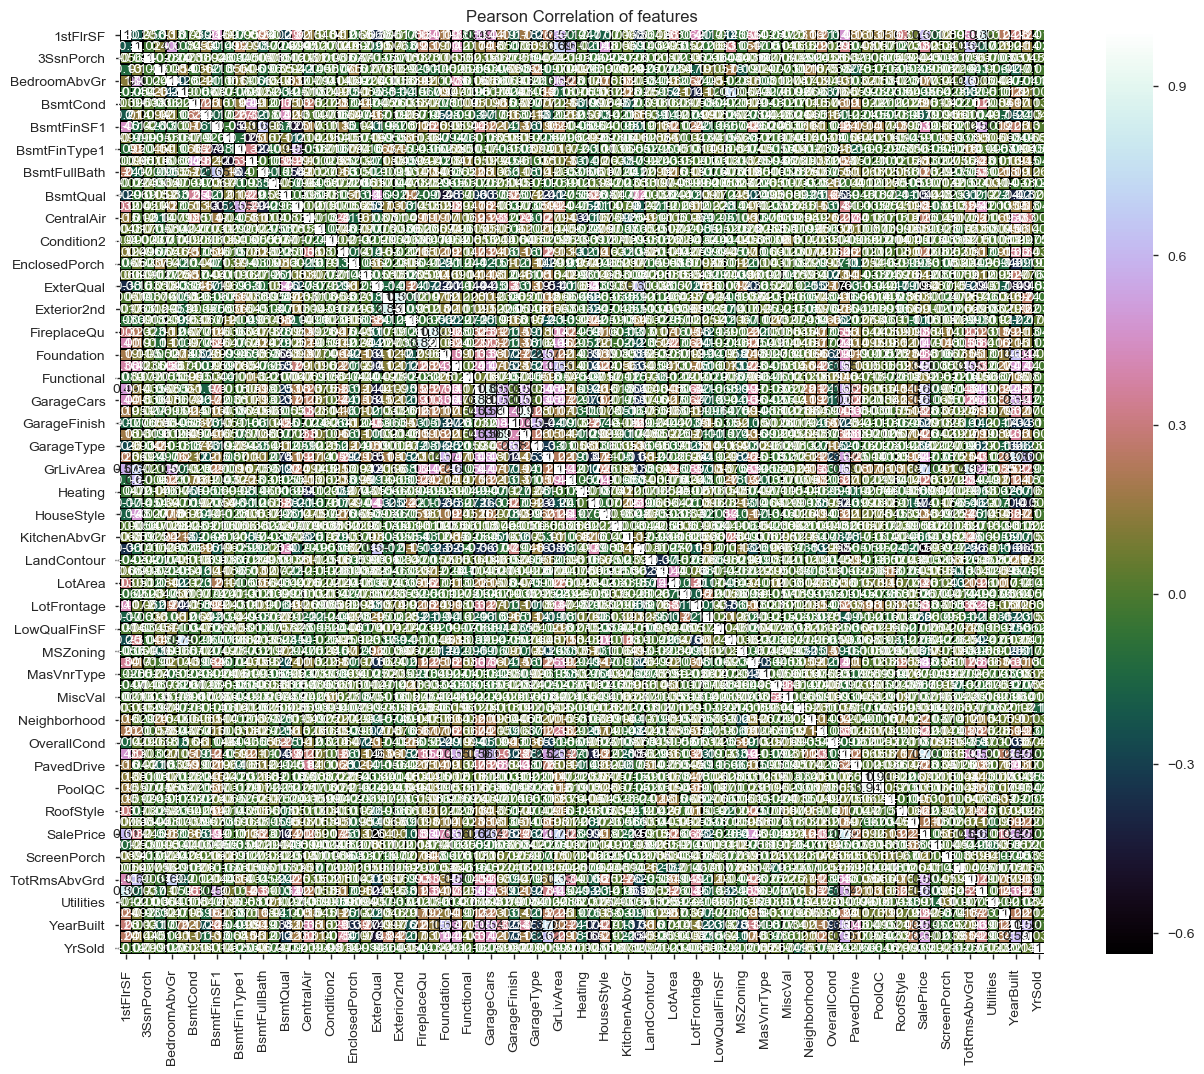

In [99]:
str_list = [] 
for colname, colvalue in housing_train.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)           
num_list = housing_train.columns.difference(str_list) 
house_num = housing_train[num_list]
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation of features')

sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)

In [103]:
Y = housing_train.SalePrice.values
housing_train1 = housing_train.drop(['SalePrice'], axis=1)
X = housing_train1.as_matrix()

C:\Users\Vijay\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [104]:
ranks = {}
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [108]:
colnames

NameError: name 'colnames' is not defined

In [107]:
rlasso = RandomizedLasso(alpha=0.04)
rlasso.fit(X, Y)

ranks["rlasso/Stability"] = ranking(np.abs(rlasso.scores_), colnames)
print('finished')
colnames

C:\Users\Vijay\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class RandomizedLasso is deprecated; The class RandomizedLasso is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Vijay\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Memory is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Vijay\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Parallel is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Vijay\Anaconda2\lib\site-packages\sklearn\utils\depre

NameError: name 'colnames' is not defined

In [40]:
lr = LinearRegression(normalize=True)
lr.fit(X,Y)
rfe = RFE(lr, n_features_to_select=1, verbose =3 )
rfe.fit(X,Y)
ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), colname, order=-1)

Fitting estimator with 80 features.
Fitting estimator with 79 features.
Fitting estimator with 78 features.
Fitting estimator with 77 features.
Fitting estimator with 76 features.
Fitting estimator with 75 features.
Fitting estimator with 74 features.
Fitting estimator with 73 features.
Fitting estimator with 72 features.
Fitting estimator with 71 features.
Fitting estimator with 70 features.
Fitting estimator with 69 features.
Fitting estimator with 68 features.
Fitting estimator with 67 features.
Fitting estimator with 66 features.
Fitting estimator with 65 features.
Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 fe

In [41]:
lr = LinearRegression(normalize=True)
lr.fit(X,Y)
ranks["LinReg"] = ranking(np.abs(lr.coef_), colname)

In [42]:
ridge = Ridge(alpha = 7)
ridge.fit(X,Y)
ranks['Ridge'] = ranking(np.abs(ridge.coef_), colname)

In [43]:
lasso = Lasso(alpha=.05)
lasso.fit(X, Y)
ranks["Lasso"] = ranking(np.abs(lasso.coef_), colname)

In [44]:
rf = RandomForestRegressor(n_jobs=-1, n_estimators=50, verbose=3)
rf.fit(X,Y)
ranks["RF"] = ranking(rf.feature_importances_, colname);

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 50
building tree 2 of 50
 building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.3s


building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.9s finished


In [46]:
r = {}
for name in colname:
    r[name] = round(np.mean([ranks[method][name] 
                              
                for method in ranks.keys()]), 2)
 

methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")
 
print("\t%s" % "\t".join(methods))
for name in colname:
    print("%s\t%s" % (name, "\t".join(map(str, 
                         [ranks[method][name] for method in methods]))))

	Lasso	LinReg	Mean	RF	RFE	Ridge	rlasso/Stability	Mean
S	0.0	0.0	0.17	0.01	0.03	0.0	0.99	0.17
a	0.0	0.0	0.2	0.0	0.18	0.0	1.0	0.2
l	0.0	0.0	0.2	0.01	0.22	0.0	1.0	0.2
e	0.0	0.0	0.17	0.02	0.01	0.0	1.0	0.17
C	0.05	0.0	0.53	1.0	1.0	0.15	1.0	0.53
o	0.0	0.56	0.21	0.01	0.68	0.0	0.0	0.21
n	0.0	0.56	0.4	0.07	0.75	0.0	1.0	0.4
d	0.0	0.0	0.18	0.01	0.08	0.0	0.99	0.18
i	0.0	0.56	0.37	0.0	0.7	0.0	0.98	0.37
t	0.0	0.56	0.38	0.06	0.71	0.0	0.92	0.38
i	0.0	0.56	0.37	0.0	0.7	0.0	0.98	0.37
o	0.0	0.56	0.21	0.01	0.68	0.0	0.0	0.21
n	0.0	0.56	0.4	0.07	0.75	0.0	1.0	0.4


In [48]:

meanplot = pd.DataFrame(list(r.items()), columns= ['Feature','Mean Ranking'])

meanplot = meanplot.sort_values('Mean Ranking', ascending=False)

C:\Users\Vijay\Anaconda2\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Vijay\Anaconda2\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


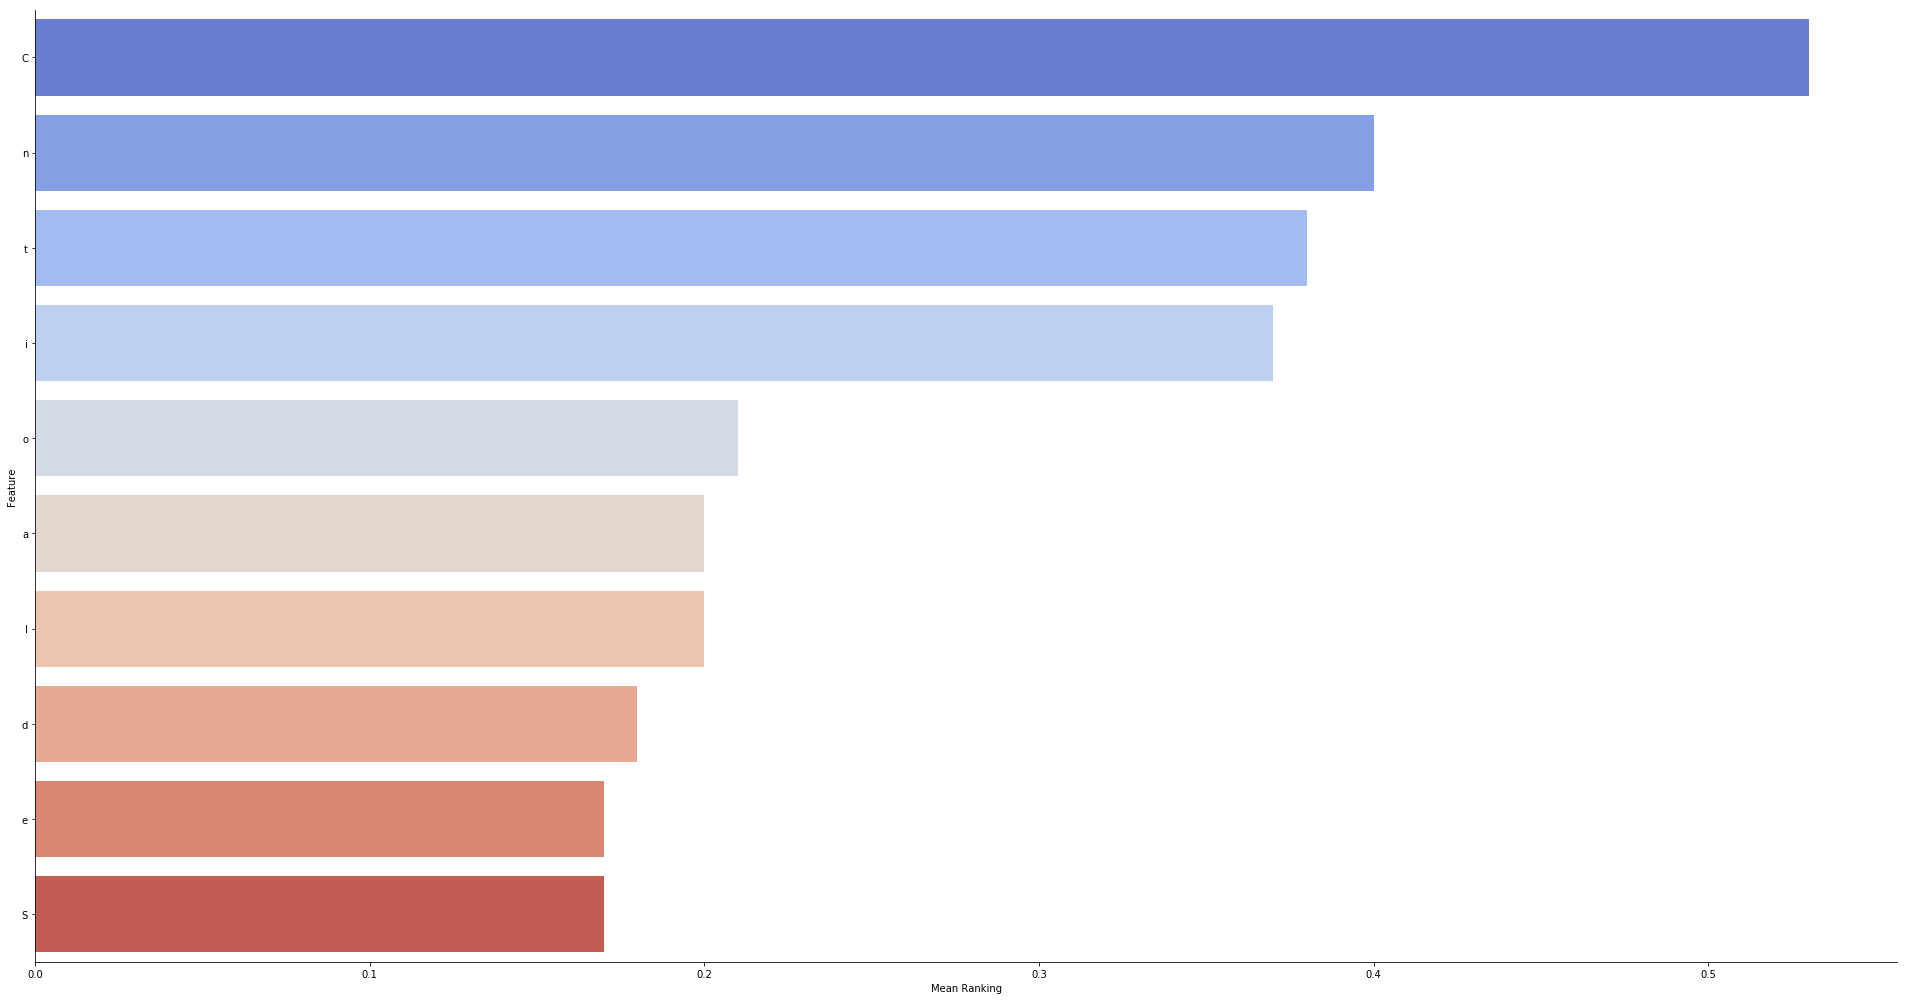

In [49]:
sns.factorplot(x="Mean Ranking", y="Feature", data = meanplot, kind="bar", 
               size=14, aspect=1.9, palette='coolwarm')

In [50]:
meanplot.values

array([['C', 0.53],
       ['n', 0.4],
       ['t', 0.38],
       ['i', 0.37],
       ['o', 0.21],
       ['a', 0.2],
       ['l', 0.2],
       ['d', 0.18],
       ['e', 0.17],
       ['S', 0.17]], dtype=object)

array([0, 1, 2, 3], dtype=int64)

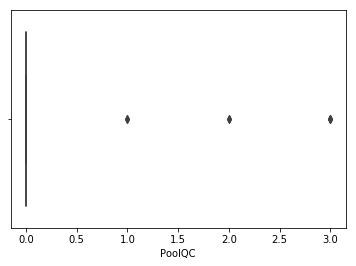

In [51]:
sns.boxplot(x=housing_train['PoolQC'])
housing_train['PoolQC'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

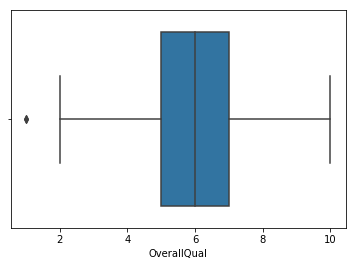

In [52]:
sns.boxplot(x=housing_train['OverallQual'])
housing_train['OverallQual'].unique()

0

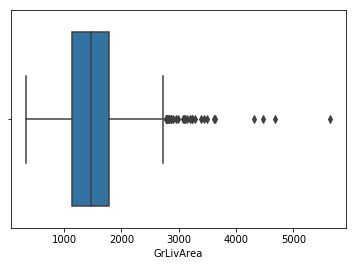

In [53]:
sns.boxplot(x=housing_train['GrLivArea'])
median = housing_train.loc[housing_train['GrLivArea']<2800, 'GrLivArea'].median()
housing_train['GrLivArea'] = np.where(housing_train['GrLivArea'] >2800, median, housing_train['GrLivArea'])
sum(i > 2800 for i in housing_train['GrLivArea'])

array([  0, 360, 513, 234, 528, 572, 144, 392, 371, 390, 420, 473, 156,
       515,  80,  53, 232, 481, 120, 514, 397, 479, 205, 384], dtype=int64)

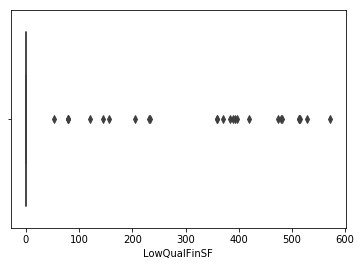

In [54]:
sns.boxplot(x=housing_train['LowQualFinSF'])
housing_train['LowQualFinSF'].unique()
#median = housing_train.loc[housing_train['GrLivArea']<2800, 'GrLivArea'].median()
#housing_train['GrLivArea'] = np.where(housing_train['GrLivArea'] >2800, median, housing_train['GrLivArea'])
#sum(i > 2800 for i in housing_train['LowQualFinSF'])

0

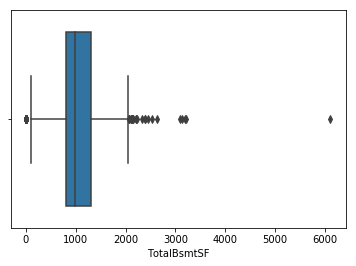

In [55]:
sns.boxplot(x=housing_train['TotalBsmtSF'])
housing_train['TotalBsmtSF'].max()
median = housing_train.loc[housing_train['TotalBsmtSF']<1500, 'TotalBsmtSF'].median()
housing_train['TotalBsmtSF'] = np.where(housing_train['TotalBsmtSF'] >1500, median, housing_train['TotalBsmtSF'])
sum(i > 1500 for i in housing_train['TotalBsmtSF'])

0

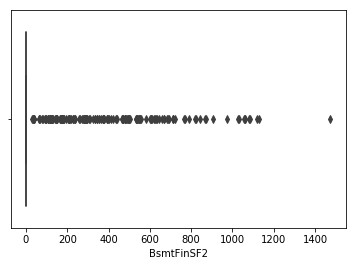

In [56]:
sns.boxplot(x=housing_train['BsmtFinSF2'])
housing_train['BsmtFinSF2'].mean()
median = housing_train.loc[housing_train['BsmtFinSF2']<70, 'BsmtFinSF2'].median()
housing_train['BsmtFinSF2'] = np.where(housing_train['BsmtFinSF2'] >70, median, housing_train['BsmtFinSF2'])
sum(i > 70 for i in housing_train['BsmtFinSF2'])

0

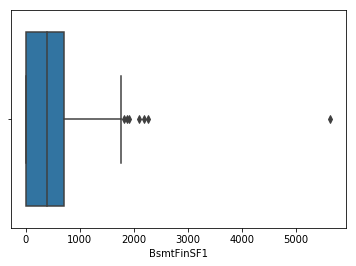

In [57]:
sns.boxplot(x=housing_train['BsmtFinSF1'])
housing_train['BsmtFinSF1'].max()
median = housing_train.loc[housing_train['BsmtFinSF1']<800, 'BsmtFinSF1'].median()
housing_train['BsmtFinSF1'] = np.where(housing_train['BsmtFinSF1'] >800, median, housing_train['BsmtFinSF1'])
sum(i > 800 for i in housing_train['BsmtFinSF1'])

1

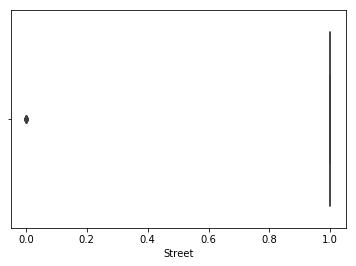

In [58]:
sns.boxplot(x=housing_train['Street'])
housing_train['Street'].max()
#median = housing_train.loc[housing_train['BsmtFinSF1']<800, 'BsmtFinSF1'].median()
#housing_train['BsmtFinSF1'] = np.where(housing_train['BsmtFinSF1'] >800, median, housing_train['BsmtFinSF1'])
#sum(i > 800 for i in housing_train['BsmtFinSF1'])

3

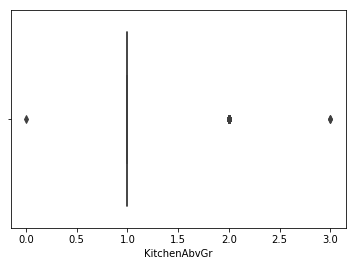

In [59]:
sns.boxplot(x=housing_train['KitchenAbvGr'])
housing_train['KitchenAbvGr'].max()
#median = housing_train.loc[housing_train['BsmtFinSF1']<800, 'BsmtFinSF1'].median()
#housing_train['BsmtFinSF1'] = np.where(housing_train['BsmtFinSF1'] >800, median, housing_train['BsmtFinSF1'])
#sum(i > 800 for i in housing_train['BsmtFinSF1'])

0

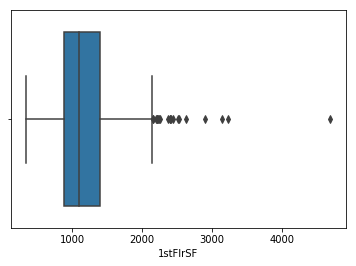

In [60]:
sns.boxplot(x=housing_train['1stFlrSF'])
housing_train['1stFlrSF'].mean()
median = housing_train.loc[housing_train['1stFlrSF']<2000, '1stFlrSF'].median()
housing_train['1stFlrSF'] = np.where(housing_train['1stFlrSF'] >2000, median, housing_train['1stFlrSF'])
sum(i > 2000 for i in housing_train['1stFlrSF'])

1.7671232876712328

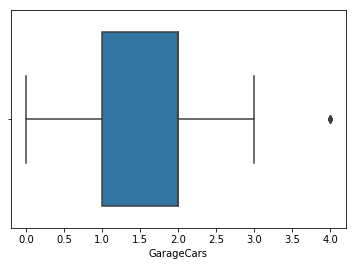

In [61]:
sns.boxplot(x=housing_train['GarageCars'])
housing_train['GarageCars'].mean()
#median = housing_train.loc[housing_train['1stFlrSF']<2000, '1stFlrSF'].median()
#housing_train['1stFlrSF'] = np.where(housing_train['1stFlrSF'] >2000, median, housing_train['1stFlrSF'])
#sum(i > 2000 for i in housing_train['1stFlrSF'])

2.5397260273972604

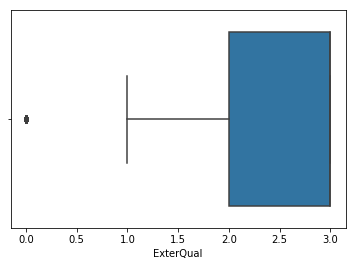

In [62]:
sns.boxplot(x=housing_train['ExterQual'])
housing_train['ExterQual'].mean()
#median = housing_train.loc[housing_train['1stFlrSF']<2000, '1stFlrSF'].median()
#housing_train['1stFlrSF'] = np.where(housing_train['1stFlrSF'] >2000, median, housing_train['1stFlrSF'])
#sum(i > 2000 for i in housing_train['1stFlrSF'])

array([2008, 2007, 2006, 2009, 2010], dtype=int64)

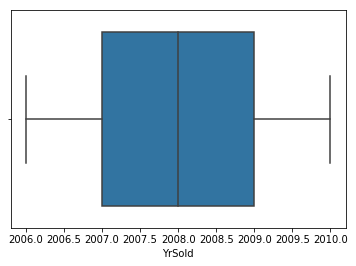

In [63]:
sns.boxplot(x=housing_train['YrSold'])
housing_train['YrSold'].unique()
#median = housing_train.loc[housing_train['1stFlrSF']<2000, '1stFlrSF'].median()
#housing_train['1stFlrSF'] = np.where(housing_train['1stFlrSF'] >2000, median, housing_train['1stFlrSF'])
#sum(i > 2000 for i in housing_train['1stFlrSF'])

array([8, 6, 0, 3, 4, 1, 5, 2, 7], dtype=int64)

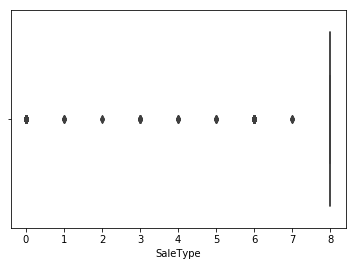

In [64]:
sns.boxplot(x=housing_train['SaleType'])
housing_train['SaleType'].unique()
#median = housing_train.loc[housing_train['1stFlrSF']<2000, '1stFlrSF'].median()
#housing_train['1stFlrSF'] = np.where(housing_train['1stFlrSF'] >2000, median, housing_train['1stFlrSF'])
#sum(i > 2000 for i in housing_train['1stFlrSF'])

0

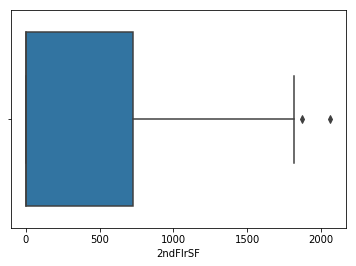

In [65]:
sns.boxplot(x=housing_train['2ndFlrSF'])
housing_train['2ndFlrSF'].max()
median = housing_train.loc[housing_train['2ndFlrSF']<600, '2ndFlrSF'].median()
housing_train['2ndFlrSF'] = np.where(housing_train['2ndFlrSF'] >600, median, housing_train['2ndFlrSF'])
sum(i > 600 for i in housing_train['2ndFlrSF'])

In [66]:
from sklearn.model_selection import train_test_split
lr = LinearRegression()
X = housing_train.loc[:,['OverallQual','GrLivArea','BsmtFinSF1','1stFlrSF','GarageCars','SaleType']]
x_train, x_cv, y_train, y_cv = train_test_split(X,housing_train.SalePrice)
lr.fit(x_train,y_train)
pred = lr.predict(x_cv)
mse = np.mean((pred - y_cv)**2)
mse

1699756386.273367

In [67]:
coeff = pd.DataFrame(x_train.columns)

In [68]:
from pandas import Series
coeff['Coefficient Estimate'] = Series(lr.coef_)

coeff

0  Coefficient Estimate
0  OverallQual          30448.144536
1    GrLivArea             34.031183
2   BsmtFinSF1             20.094742
3     1stFlrSF             34.817390
4   GarageCars          17098.250214
5     SaleType            741.265996

In [69]:
np.sqrt(mse)

41228.101899958565

Text(0.5,1,'Residual plot')

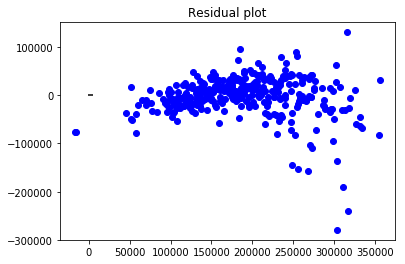

In [70]:
x_plot = plt.scatter(pred, (pred - y_cv), c='b')

plt.hlines(y=0, xmin= -1000, xmax=5000)

plt.title('Residual plot')

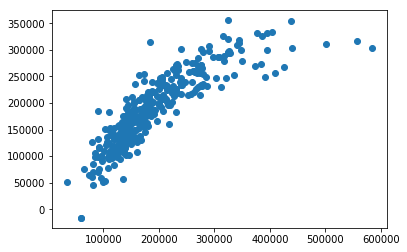

In [71]:
plt.scatter(y_cv,pred)